## 머신러닝이란?
-  어떤 작업 T에 대한 컴퓨터 프로그램 성능을 P로 측정했을 때 경험 E로 인해 성능이 향상됬다면, 이 컴퓨터 프로그램은 작업 T와 성능 측정 P에대해 경험 E로 학습한 것<br><br>

- 기존 솔루션으로는 많은 수동 조정과 규칙이 필요한 문제에 뛰어남

## 데이터 마이닝
- 겉으로 보이지 않는 패턴 발견

## 머신러닝 시스템의 종류
- 사람의 감독하에 훈련하는 것인지 그렇지 않은 것인지(**지도, 비지도, 준지도, 강화학습**)<br><br>

- 실시간으로 점진적인 학습을 하는지 아닌지(**온라인 학습과 배치 학습**)<br><br>

- 단순하게 알고 있는 데이터 포인트와 새 데이터 포인트를 비교하는 것인지 아니면 과학자들이 하는 것 처럼 훈련 데이터 셋 에서 패턴을 발견하여 예측 모델을 만드는지(**사례 기반 학습과 모델 기반 학습**)

## 지도학습
- 훈련 데이터에 레이블이라는 원하는 답 포함<br><br>

- ex) 분류 : 스팸필터( 메일이 스팸인가 아닌가 ? )<br><br>

- ex) 회귀 : 예측변수(특성)인 (주행거리, 연식, 브랜드)를 사용해 중고차 가격 같은 타깃 수치 예측

### 지도학습 알고리즘
- k - 최근접 이웃(k-nearest neighbors)<br><br>

- 선형회귀(linear regression)<br><br>

- 로지스틱 회귀<br><br>

- 서포트 벡터 머신(support vector machine)(SVM)<br><br>

- 결정 트리(decision tree)와 랜덤 포레스트(random forest)<br><br>

- 신경망(neural networks)

## 비지도 학습
- 훈련 데이터에 레이블이 없음. 시스템이 아무런 도움 없이 학습<br><br>

### 비지도 학습 알고리즘
- 군집(clustering)<br><br>
 - K-평균(K-means)
 - DBSCAN
 - 계층 군집 분석(hierarchical cluster analysis)(HCA)
 - 이상치 탐지(outlier detection)과 특이치 탐지(novelty detection)
 - 원-클래스(one-class SVM)
 - 아이솔레이션 포레스트(isolation forest)<br><br>

- 시각화visualization과 차원축소dimensionality reduction<br><br>
 - 주성분 분석(principal component analysis)(PCA)
 - 커널(kernel)PCA
 - 지역적 선형 임베딩(locally-linear embedding)(LLE)
 - t-SNE(t-distributed stochastic neighbor embedding)<br><br>

- 연간 규칙 학습(association rule learning)<br><br>
 - 어프라이처리(Apriori)
 - 이클렛(Eclat)

- **계층 군집 알고리즘**을 사용하면 각 그룹을 더 작은 그룹으로 세분화 가능<br><br>

- **시각화 알고리즘**은 데이터가 어떻게 조직되어 있는지 이해할 수 있고, 예상하지 못한 패턴 발견 가능<br><br>

- **이상치 탐지** : 학습 알고리즘에 주입하기 전 데이터 셋에서 이상한 값 제거<br><br>

- **준지도 학습** : 일부만 레이블이 있는 데이터 다룰 수 있음<br><br>

- **강화 학습** : 시간이 지나면서 보상을 얻기 위한 정책이라 불리는 최상의 전략을 스스로 학습<br><br>

- **배치 학습** : 시스템이 점진적으로 학습 못함. 가용한 데이터를 모두 사용해 훈련함. 학습한것을 단지 적용만함 이것을 오프라인 학습이라 함<br><br>

- **온라인 학습**: 미니배치mini-batch라 부르는 작은 묶음 단위로 주입하여 시스템을 훈련시킴<br><br>



- **학습률** : 변화하는 데이터에 얼마나 빠르게 적응할 것인가

### 사례 기반 학습
- 단순히 기억하여 학습하고 데이터 간의 유사도 측정을 통해 판단함

### 모델 기반 학습
- 샘플들의 모델을 만들어 예측에 사용하는 것

### 예제

In [1]:
import sys
import sklearn

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [4]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

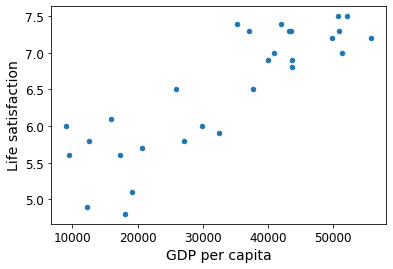

[[5.96242338]]


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv', thousands = ',')
gdp_per_capita = pd.read_csv('datasets/lifesat/gdp_per_capita.csv', thousands = ',', delimiter = '\t',
                            encoding = 'latin1', na_values = 'n/a')

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

- **샘플링 잡음** : 우연에 의한 대표성 없는 데이터, 샘플 수 적을 때 발생<br><br>

- **샘플링 편향** : 표본이 대표성을 띄지 못하는 것<br><br>

- **특성 공학(feature engineering)** : 가지고 있는 특성 중 훈련에 가장 유용한 특성을 선택하는 특성 선택(feature selection)과 특성을 결합하여 더 유용한 특성을 만드는 특성 추출(feature extraction)을 포함하는 좋은 특성을 찾는 것<br><br>

- 과대적합(Overfitting) : 모델이 훈련 데이터에 너무 잘 맞지만 일반성이 떨어진다는 뜻<br><br>

- 과소적합(Underfitting) : 모델이 너무 단순해서 데이터의 내재된 구조를 학습하지 못할 때 일어난다. 훈련 샘플에서 조차도 부정확<br><br>

- 규제(regularization) : 모델을 단순하게 하고 과대적합의 위험을 감소시키기 위해 모델에 제약을 가하는 것

## 테스트와 검증
- 하이퍼파라미터 : 학습 알고리즘의 파라미터 ( 모델의 파라미터 X ). 학습 알고리즘으로 부터 영향을 받지 않고, 훈련 전 미리 지정되고, 훈련하는 동안 상수로 남아있는다.<br><br>

- 테스트 세트 : 실전에 배치되기 전에 모델이 새로운 샘플에 대해 만들 일반화 오차를 추정하기 위해 사용한다.<br><br>

- 검증 세트 : 다양한 하이퍼파라미터로 여러 모델을 훈련시키고 검증 세트에서 최상의 성능을 내는 모델과 하이퍼파라미터를 선택<br><br>

- 교차 검증 : 훈련 세트를 여러 subset으로 나누고 모델을 이 subset조합을 훈려ㄴ시키고 나머지 부분으로 검증, 모델&하이퍼파라미터가 선택되면 전체 훈련 데이터를 사용하여 선택한 하이퍼파라미터로 최종 모델을 훈련시키고 테스트 세트에서 일반화 오차를 측정

## 연습문제

1. 머신러닝을 어떻게 정의 가능한가:

    머신러닝은 데이터로 부터 학습(주어진 성능 지표가 더 나아 지는것)할수 있는 시스템을 만드는 것.

2. 머신러닝이 도움을 줄 수 있는 문제 유형 4가지는?
    
    명확한 해결책이 없는 복잡한 문제
    
    수작업으로 만든 긴 규칙 리스트를 대체하는 경우
    
    변화하는 환경에 적응하는 시스템을 만드는 경우
    
    사람에게 통찰을 제공해야 하는경우

3. 레이블된 훈련 세트란?
    
    각 샘플에 대해 원하는 정답(레이블)을 담고 있는 훈련 세트

4. 가장 널리 사용되는 지도 학습 두가지
    
    회귀 / 분류

5. 보편적인 비지도 학습 작업 네가지는?
    
    군집 / 시각화 / 차원 축소 / 연관 규칙 학습

6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘 사용 가능한가?
    
    강화 학습

7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘 사용 해야하나?

    그룹을 어떻게 정의할지 모른다면 비슷한 고객끼리 군집으로 나누기 위해 군집 알고리즘(비지도 학습)사용 가능
    
    그룹을 안다면 분류알고리즘(지도학습)에 각 그룹에 대한 샘플 주입

8. 스팸감지는 지도 학습

9. 온라인 학습 시스템이란?
    
    온라인 학습 시스템은 배치 학습 시스템과 달리 점진적으로 학습 가능. 이 방식은 변화하는 데이터와 자율 시스템에 빠르게 적용하고 매우 많은 양의 데이터 훈련 가능

10. 외부 메모리 학습이란?

    외부 메모리 알고리즘은 대용량의 데이터를 다룰 수 있다. 외부 메모리 학습 알고리즘은 데이터를 미니배치로 나누고 온라인 학습 기법을 사용해 학습함

11. 예측을 하기위해서 유사도 측정에 의존하는 학습 알고리즘은?

    인스턴스(사례) 기반 학습 시스템. 새로운 샘플이 주어지면 유사도 측정을 사용해 학습된 샘플중 가장 비슷한 것 찾아 예측으로 사용함.

12. 모델 파라미터와 학습 알고리즘의 하이퍼 파라미터 사이에는 어떤 차이가 있나?

    하이퍼 파라미터는 모델 학습 전에 미리 지정해야 하는 학습 알고리즘이 자체적으로 가지고 있는 파라미터.
    
    모델 파라미터는 만들어진 모델의 파라미터

13. (1)모델 기반 알고리즘이 찾은것은? (2)성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은? (3)예측은 어떻게 만드나?

    (1): 모델 기반 학습 알고리즘은 새로운 샘플에 잘 일반화되기 위한 모델 파라미터의 최적 값 찾음.
    
    (2): 일반적으로 훈련 데이터에서 시스템의 예측이 얼마나 나쁜지 측정하고 모델에 규제가 있다면 모델 복잡도에 대한 패널티를 더한 비용 함수를 최소화 함으로써 시스템을 훈련 시킴
    
    (3): 예측을 만드려면 학습 알고리즘이 찾은 파라미터를 사용하는 모델의 예측함수에 새로운 샘플의 특성 주입

14. 머신러닝의 주요 도전 과제란?

    부족한 데이터, 낮은 데이터 품질, 대표성 없는 데이터, 무의미한 특성, 훈련 데이터에 과소 적합된 모델, 훈련데이터에 과대 적합된 모델

15. (1) 모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있나? (2) 가능한 해결책 3가지는?

    (1) 훈련 데이터에 과대적합(overfitting)되었을 가능성 높다.
    
    (2) 이를 해결하기 위해 더 많은 데이터 모으거나 / 모델을 단순화 하거나 / 훈련데이터에 있는 잡음 감소
    

16. 테스트 세트가 무엇이고 사용하는 이유는?
    
    실전에 배치되기 전에 모델이 새로운 샘플에 대해 만들 일반화 오차를 추정하기 위해 사용

17. 검증 세트의 목적은?

    모델을 비교하는데 사용. 이를 사용해 가장 좋은 모델 고르고 하이퍼 파라미터 튜닝. 다양한 하이퍼 파라미터로 여러 모델을 훈련 시키고 검증 세트에서 최상의 성능을 내는 모델과 하이퍼 파라미터 선택

18. 테스트 세트를 사용해 하이퍼 파라미터를 튜닝하면 어떤 문제가 생기나?

    테스트 데이터를 사용해 하이퍼 파라미터를 튜닝하면 테스트 세트에 과대적합(Overfitting)될 위험이 있고, 일반화 오차는 매우 낙관적으로 측정 될 것이다.(모델의 성능이 예상보다 나쁠 것 이다.)

19. (1) 교차 검증이 무엇인가? (2) 왜 하나의 검증 세트보다 선호하나?

    (1) 검증세트를 별도로 분리하지 않고( 모델 선택과 하이퍼 파라미터 튜닝을 위해) 모델을 비교할 수 있는 기술
    
    (2) 훈련 데이터를 최대한 활용하도록 도와줌